In [2]:
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent / 'src'))

from src.data.preprocessing import load_ml1m_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

# Wczytanie danych
data_dir = "../data/raw/ml-1m"
ratings_df, movies_df = load_ml1m_data(data_dir)

In [3]:
print("Basic info about dataset:")
print(ratings_df.info())

Basic info about dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   user_id    1000209 non-null  int64
 1   movie_id   1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB
None


In [4]:
print("\nRating statistics:")
print(ratings_df['rating'].describe())


Rating statistics:
count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64


In [5]:
n_users = ratings_df['user_id'].nunique()
n_movies = ratings_df['movie_id'].nunique()
n_ratings = len(ratings_df)

print(f"\nLiczba unikalnych użytkowników: {n_users}")
print(f"Liczba unikalnych filmów: {n_movies}")
print(f"Całkowita liczba ocen: {n_ratings}")
print(f"Gęstość macierzy ocen: {n_ratings / (n_users * n_movies):.4%}")


Liczba unikalnych użytkowników: 6040
Liczba unikalnych filmów: 3706
Całkowita liczba ocen: 1000209
Gęstość macierzy ocen: 4.4684%


In [6]:
plt. figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0, 0.5, 'Liczba ocen')

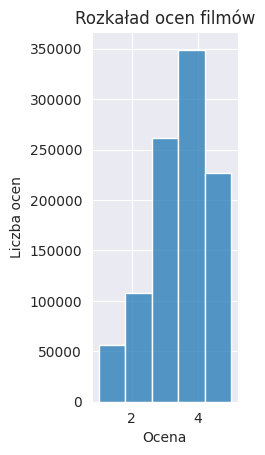

In [7]:
#Rozkład ocen
plt.subplot(131)
sns.histplot(data=ratings_df, x='rating', bins=5)
plt.title('Rozkaład ocen filmów')
plt.xlabel('Ocena')
plt.ylabel('Liczba ocen')

Text(0, 0.5, 'Liczba użytkowników')

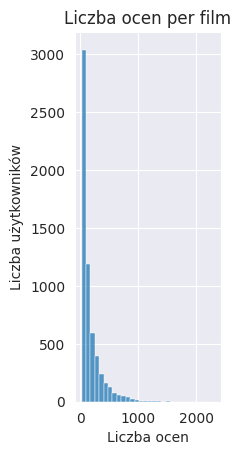

In [8]:
#Rozkład liczby ocen per film
plt.subplot(132)
user_ratings = ratings_df.groupby('user_id')['rating'].count()
sns.histplot(data=user_ratings, bins=30)
plt.title('Liczba ocen per film')
plt.xlabel('Liczba ocen')
plt.ylabel('Liczba użytkowników')

Text(0, 0.5, 'Liczba filmów')

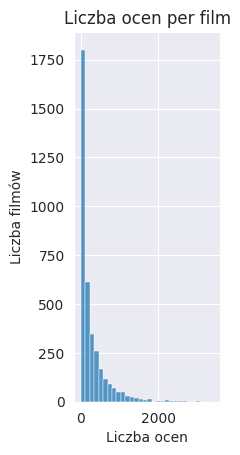

In [9]:
#Rozkład liczby ocen per film
plt.subplot(133)
user_ratings = ratings_df.groupby('movie_id')['rating'].count()
sns.histplot(data=user_ratings, bins=30)
plt.title('Liczba ocen per film')
plt.xlabel('Liczba ocen')
plt.ylabel('Liczba filmów')

In [10]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

Dodać lepsze histogramy, uzupełnić wykresy

Overfitting issue in training

In [11]:
rating_stats = ratings_df['rating'].describe()
print("Rating statistics before normalization:")
print(rating_stats)

Rating statistics before normalization:
count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64


In [12]:
processed_ratings = ratings_df['rating'] / 5.0
print("Rating statistics after normalization:")
print(processed_ratings)

Rating statistics after normalization:
0          1.0
1          0.6
2          0.6
3          0.8
4          1.0
          ... 
1000204    0.2
1000205    1.0
1000206    1.0
1000207    0.8
1000208    0.8
Name: rating, Length: 1000209, dtype: float64
